In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv ("Batting.csv")

In [87]:
data.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.000000
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,0.271186
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,0.291971
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,0.330827
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,0.325000


In [27]:
#mendoza played from 1974 to 1982:

In [28]:
years_1974_to_1982 = data[(data["yearID"]>=1974)&(data["yearID"]<1983)]

In [29]:
years_1974_to_1982

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
51767,aaronha01,1974,1,ATL,NL,112,340,47,91,16,...,69.0,1.0,0.0,39,29.0,6.0,0.0,1.0,2.0,6.0
51768,abbotgl01,1974,1,OAK,AL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
51769,acostcy01,1974,1,CHA,AL,27,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
51770,akerja01,1974,1,ATL,NL,17,1,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
51771,akerja01,1974,2,NYN,NL,24,2,1,1,1,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60260,yountro01,1982,1,ML4,AL,156,635,129,210,46,...,114.0,14.0,3.0,54,63.0,2.0,1.0,4.0,10.0,19.0
60261,zachrpa01,1982,1,NYN,NL,36,38,3,3,0,...,0.0,0.0,0.0,1,17.0,0.0,0.0,2.0,0.0,0.0
60262,zahnge01,1982,1,CAL,AL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
60263,ziskri01,1982,1,SEA,AL,131,503,61,147,28,...,62.0,2.0,1.0,49,89.0,4.0,1.0,0.0,3.0,9.0


In [30]:
# Adding a the batting average to the time when Mendoza was a player:

years_1974_to_1982 ["AVG"] =  years_1974_to_1982 ["H"] / years_1974_to_1982["AB"]

In [31]:
years_1974_to_1982

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG
51767,aaronha01,1974,1,ATL,NL,112,340,47,91,16,...,1.0,0.0,39,29.0,6.0,0.0,1.0,2.0,6.0,0.267647
51768,abbotgl01,1974,1,OAK,AL,19,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
51769,acostcy01,1974,1,CHA,AL,27,2,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000
51770,akerja01,1974,1,ATL,NL,17,1,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
51771,akerja01,1974,2,NYN,NL,24,2,1,1,1,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60260,yountro01,1982,1,ML4,AL,156,635,129,210,46,...,14.0,3.0,54,63.0,2.0,1.0,4.0,10.0,19.0,0.330709
60261,zachrpa01,1982,1,NYN,NL,36,38,3,3,0,...,0.0,0.0,1,17.0,0.0,0.0,2.0,0.0,0.0,0.078947
60262,zahnge01,1982,1,CAL,AL,34,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
60263,ziskri01,1982,1,SEA,AL,131,503,61,147,28,...,2.0,1.0,49,89.0,4.0,1.0,0.0,3.0,9.0,0.292247


In [88]:
years_1974_to_1982 = np.arange (1972, 1983)

In [89]:
years_1974_to_1982

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982])

In [90]:
for y in years_1974_to_1982:
    print (y)

1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982


In [81]:
years = np.arange (1974, 1983)

In [33]:
# Dividing the table years_1974_to_1982 by each year:

data_by_year_list = []
for year in years:
    x = years_1974_to_1982[years_1974_to_1982["yearID"]==year]
    data_by_year_list.append (x)

In [34]:
# data_by_year_list[0] is going to show the year 1974:

data_by_year_list[0].head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG
51767,aaronha01,1974,1,ATL,NL,112,340,47,91,16,...,1.0,0.0,39,29.0,6.0,0.0,1.0,2.0,6.0,0.267647
51768,abbotgl01,1974,1,OAK,AL,19,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
51769,acostcy01,1974,1,CHA,AL,27,2,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000
51770,akerja01,1974,1,ATL,NL,17,1,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
51771,akerja01,1974,2,NYN,NL,24,2,1,1,1,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000


In [35]:
#Calculating the batting average from 1974 and 1982 and storing the results in a dictionary:

year_avg_from_1974_to_1982 = {}
for i in range (len (data_by_year_list)):
    try:
        x = sum (data_by_year_list[i] ["H"]) / sum (data_by_year_list[i] ["AB"])  
    except ZeroDivisionError:
        continue 
    year = data_by_year_list[i]["yearID"].iloc[0]
    year_avg_from_1974_to_1982[year] = x 

In [36]:
year_avg_from_1974_to_1982

{1974: 0.25684278974110814,
 1975: 0.2575661922980384,
 1976: 0.2554495343090667,
 1977: 0.26419169994790764,
 1978: 0.2578849590653189,
 1979: 0.2654980671186061,
 1980: 0.26459489456159824,
 1981: 0.2557189283030053,
 1982: 0.26119501349298296}

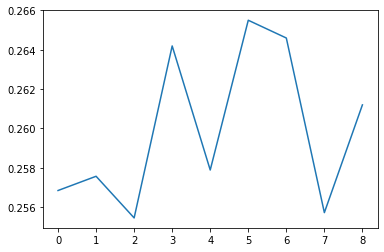

In [37]:
# The following plot shows the batting average from 1974 to 1982:

plt.plot( list (year_avg_from_1974_to_1982.values()))

In [38]:
# The following calculates the standard deviation of every year from 1974 to 1983

year_std_from_1974_to_1982 = {}
for i in range (len (data_by_year_list)):
    try:
        year = data_by_year_list[i]["yearID"].iloc[0]
    except IndexError:
        continue
    std = np.std (data_by_year_list [i]["AVG"]) 
    year_std_from_1974_to_1982[year] = std
    

In [39]:
year_std_from_1974_to_1982

{1974: 0.12343596048281688,
 1975: 0.11368952614622961,
 1976: 0.10583840871725651,
 1977: 0.10603785319215159,
 1978: 0.10784518701009231,
 1979: 0.12153646596909404,
 1980: 0.1032555149267634,
 1981: 0.11959107648133226,
 1982: 0.10581649275986516}

In [40]:
#mendoza:

In [41]:
mendoza = data[data["playerID"]=="mendoma01"]

In [42]:
mendoza_career_avg = sum (mendoza["H"]) / sum (mendoza["AB"])

In [43]:
mendoza_career_avg

0.21465968586387435

In [44]:
mendoza ["AVG"] = mendoza ["H"] / mendoza["AB"]

In [45]:
mendoza

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG
52329,mendoma01,1974,1,PIT,NL,91,163,10,36,1,...,1.0,1.0,8,35.0,2.0,1.0,3.0,2.0,6.0,0.220859
53226,mendoma01,1975,1,PIT,NL,56,50,8,9,1,...,0.0,0.0,3,17.0,0.0,0.0,3.0,0.0,1.0,0.180000
54128,mendoma01,1976,1,PIT,NL,50,92,6,17,5,...,0.0,1.0,4,15.0,1.0,0.0,0.0,1.0,3.0,0.184783
55070,mendoma01,1977,1,PIT,NL,70,81,5,16,3,...,0.0,0.0,3,10.0,0.0,0.0,2.0,0.0,1.0,0.197531
56025,mendoma01,1978,1,PIT,NL,57,55,5,12,1,...,3.0,1.0,2,9.0,1.0,3.0,2.0,0.0,0.0,0.218182
56978,mendoma01,1979,1,SEA,AL,148,373,26,74,10,...,3.0,0.0,9,62.0,0.0,1.0,13.0,5.0,12.0,0.198391
57937,mendoma01,1980,1,SEA,AL,114,277,27,68,6,...,3.0,4.0,16,42.0,0.0,0.0,11.0,1.0,5.0,0.245487
58878,mendoma01,1981,1,TEX,AL,88,229,18,53,6,...,2.0,1.0,7,25.0,0.0,1.0,14.0,3.0,9.0,0.231441
59836,mendoma01,1982,1,TEX,AL,12,17,1,2,0,...,0.0,0.0,0,4.0,0.0,0.0,1.0,0.0,1.0,0.117647


In [46]:
# zscore = x - mean / std 

In [47]:
# Calculate how many standard deviations away Mendoza was from each year's average:

In [52]:
# This list contains mendoza's zscores from 1974 to 1982:
mendoza_zscores_1974_to_1982 = [] 

for a,b,c in zip (mendoza["AVG"], year_avg_from_1974_to_1982.values(),year_std_from_1974_to_1982.values()):
    zscore = a - b / c
    mendoza_zscores_1974_to_1982.append (zscore)
    
    
# This list contains mendoza's zscores score average:
mendoza_zscore_avg = sum(mendoza_zscores_1974_to_1982) /len (mendoza_zscores_1974_to_1982) 


print (mendoza_zscore_avg)
print ("--------")
print ("--------")
print (mendoza_zscores_1974_to_1982)

-2.1335544547669922
--------
--------
[-1.859918770190815, -2.0855226125821993, -2.2287980318777607, -2.293953940470901, -2.1730696248815207, -1.986122214577269, -2.3170381794070867, -1.9068366213940395, -2.350730097521336]


In [53]:
# Add an average to the entire dataset and the divide the data set by year 
# to calculate the average of those samples:

In [57]:
data["AVG"]  = data ["H"] / data["AB"]

In [61]:
years_1871_to_2019 = np.arange (1871, 2019)

In [78]:
# The follwoing dictionary includes the batting average from 1871 to 2019:

batting_avg_by_year = {}

for year in years_1871_to_2019:
    year_data = data [data["yearID"] == year]
    year_avg = sum (year_data["H"]) / sum (year_data["AB"])
    batting_avg_by_year [year] = year_avg

batting_avg_by_year
    

{1871: 0.28654592496765846,
 1872: 0.2851944072016855,
 1873: 0.2904652396957368,
 1874: 0.2734505862646566,
 1875: 0.25386650765848023,
 1876: 0.2652949654589732,
 1877: 0.27109094900124386,
 1878: 0.25938141307534446,
 1879: 0.2554750569240323,
 1880: 0.24468128883585039,
 1881: 0.2600402018295935,
 1882: 0.248258132718274,
 1883: 0.25711808565978844,
 1884: 0.24327612704918034,
 1885: 0.24400159426066162,
 1886: 0.2464656437259177,
 1887: 0.27074329296848865,
 1888: 0.2386033749121807,
 1889: 0.2637359763592144,
 1890: 0.26025449696669994,
 1891: 0.2537857326809168,
 1892: 0.2448963617007953,
 1893: 0.2796759112798341,
 1894: 0.3093075359952759,
 1895: 0.296312601253786,
 1896: 0.29042589560429677,
 1897: 0.2915835730547271,
 1898: 0.27058297824803307,
 1899: 0.28229322470801643,
 1900: 0.2791832771133599,
 1901: 0.2717981972634719,
 1902: 0.2667802831672784,
 1903: 0.2621455745701825,
 1904: 0.2468601493550577,
 1905: 0.24801749734240783,
 1906: 0.24658697742970984,
 1907: 0.245330

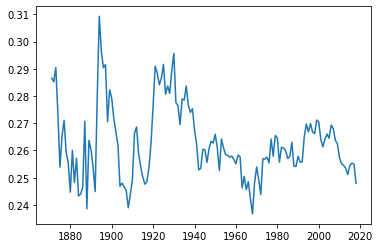

In [79]:
# This graph shows the batting average from 1871 to 2019: 

plt.plot ( np.arange (1871,2019 ),list (batting_avg_by_year.values()))

In [80]:
data

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.000000
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,0.271186
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,0.291971
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,0.330827
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,0.325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105856,zimmebr01,2018,1,CLE,AL,34,106,14,24,5,...,4.0,1.0,7,44.0,0.0,1.0,0.0,0.0,1.0,0.226415
105857,zimmejo02,2018,1,DET,AL,25,2,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000
105858,zimmery01,2018,1,WAS,NL,85,288,33,76,21,...,1.0,1.0,30,55.0,1.0,3.0,0.0,2.0,10.0,0.263889
105859,zobribe01,2018,1,CHN,NL,139,455,67,139,28,...,3.0,4.0,55,60.0,1.0,2.0,1.0,7.0,8.0,0.305495
